In [2]:
import numpy as np

from RSA.Circles.gen_sieve_curve import *
from RSA.Circles.circle_Compaction import *
from RSA.Circles.circle_RSA import *

# Generating Input file

## Generating aggregates with Random Sequential Adsorption

### Generating random sieve curve within Class 1 & 2 of SBB Gleisschotter

In [3]:
# Input values: 
# Sieve curve according to Gleisschotter 32/50, class 1 & 2
# [[mm],lower bound, upper bound]
sieve_63 = np.array([0.063,1,1])
sieve_50 = np.array([0.050,0.7,0.99])    
sieve_40 = np.array([0.040,0.3,0.65])     
sieve_31 = np.array([0.0315,0.01,0.25])
sieve_22 = np.array([0.0224,0.01,0.03])
sieve_low_limit = np.array([0.018,0,0])
grad_curve_bounds = np.vstack([sieve_63,sieve_50,sieve_40,sieve_31,sieve_22,sieve_low_limit])

In [4]:
grad_curve = pick_rand_curve(grad_curve_bounds)
grad_curve_conv = convert_sieve_curve(grad_curve)

### Generating 2D aggregates with RSA

In [5]:
# Input values:

# Required void after RSA
# NOTE: 0.41 - 0.45 seems reasonable
required_void = 0.44

# Sample dimensions [m]:
height_sample = 0.4
width_sample = 1.5

# Min distance between aggregates [m]:
tol = 0

#Maximum runtime until timeout [s]:
timeout = 120 

In [6]:
# Run RSA Algorithm
cirList, cur_void = rsa_circle_graded(grad_curve_conv, required_void,height_sample,width_sample,tol,timeout)



------------------------------------------------
Found a solution in  2.71  seconds
Current void:  0.4397
------------------------------------------------


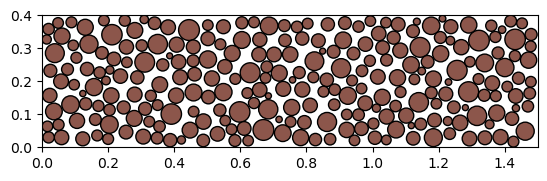

In [9]:
plot(cirList, height_sample,width_sample)

### Compacting aggregates

In [7]:
#Insert run pattern, where even index discribes #vertical compactions and odd #horizontal compactions
#For example [2,2,1]: 2 vertical, 2 horizontal and then 1 vertical
run_pattern = [1,1]

#Insert where gif should be saved, MUST have same shape as run_pattern
#For example [True, True, False]: Saves the latest gif in each direction (vertical / horizontal)
save_gif = [True,True]

#Show plots after each run?
show_plot = True

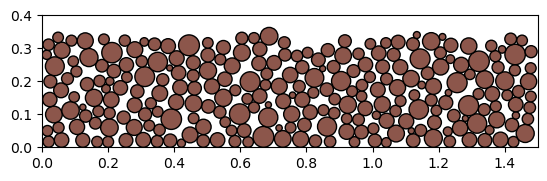

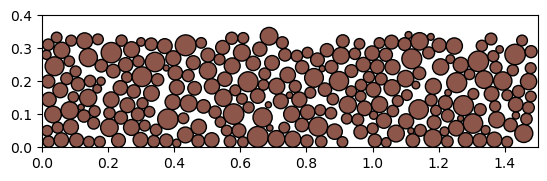

New void ratio after compaction:  0.3258


In [8]:
# Run Compaction Algorithm
comp_cirList = run_comp_pattern(cirList,height_sample,width_sample,sieve_low_limit[0],cur_void,run_pattern,save_gif,show_plot)

# Calculate new void
print("New void ratio after compaction: ",calc_void(comp_cirList))

### Save compacted aggregates into txt file

In [8]:
np.savetxt('Input_files/cirList_1.txt',comp_cirList)

## Create Input (.in) file for gprMax


In [1]:
from tools.inputfile import create_inputfile

title, geom_filename, n_steps = create_inputfile()

Output folder already exists!
c:\Users\lukas\OneDrive\Dokumente\GitHub\GPR-repo\output_files/2D_cylinders_clean_antenna
Number of steps required to run through the whole domain:  55
----------------------------------------------------------------



# Run gprMax

In [1]:
title = '2D_boxes_clean_std2_woSL'

import gprMax
gprMax.run(f'files/{title}.in',geometry_only=True,geometry_fixed=True)
# gprMax.run(f'files/{title}.in',n=5)
 


=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.6 (Big Smoke)

 Copyright (C) 2015-2022: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

### Move files to output folder

In [3]:
from tools.output_cmds import *

# Overwriting/Deleting all files in folder if they exist?
overwrite = True

move_output(overwrite,title,geom_filename,n_steps)

Stopped at: 1-th .out-file: No files named like this to move.
No .vit file named like this to move.


Waveform characteristics...
Type: ricker
Maximum (absolute) amplitude: 0.999992
Centre frequency: 1e+09 Hz
Time to centre of pulse: 1.41421e-09 s
Time window: 4e-09 s (2078 iterations)
Time step: 1.926e-12 s


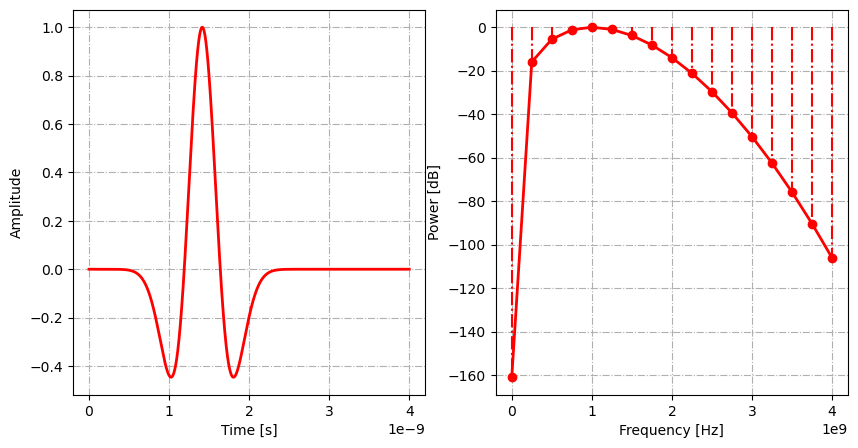

----------------------------------------------------------------
Minimum wavelength: 0.0264982 m
Maximum spatial resolution: 0.00264982 m
Minimum timewindow 2.46777e-08 s
----------------------------------------------------------------


In [1]:
from tools.spatial_and_time_wind import get_spatial_and_time_wind

get_spatial_and_time_wind('ricker',1,1e9)